In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


In [2]:
def transform_matrix(angle):
    radian = np.radians(angle)
    matrix = [[np.cos(radian), -np.sin(radian)],
              [np.sin(radian), np.cos(radian)]]
    return matrix


In [3]:
def zoom(image, x_start, y_start, zoom_factor):
    cropped_img = image.crop((x_start - zoom_factor // 2, y_start - zoom_factor //
                             2, x_start + zoom_factor // 2, y_start + zoom_factor // 2))
    return cropped_img


In [4]:
def nearest(image, matrix):
    width, height = image.size
    x_center = width / 2
    y_center = height / 2

    rotated_img = Image.new("RGB", (width, height))
    for j in range(height):
        for i in range(width):
            x = int((i - x_center) * matrix[0][0] +
                    (j - y_center) * matrix[0][1] + x_center)
            y = int((i - x_center) * matrix[1][0] +
                    (j - y_center) * matrix[1][1] + y_center)

            if 0 <= x < width and 0 <= y < height:
                rotated_img.putpixel((i, j), image.getpixel((x, y)))

    return rotated_img


In [5]:
def bilinear(image, matrix):
    width, height = image.size
    x_center = width / 2
    y_center = height / 2

    rotated_img = Image.new("RGB", (width, height))
    for j in range(height):
        for i in range(width):
            x = (i - x_center) * matrix[0][0] + (j - y_center) * matrix[0][1] + x_center
            y = (i - x_center) * matrix[1][0] + (j - y_center) * matrix[1][1] + y_center

            x1, y1 = int(x), int(y)
            x2, y2 = x1 + 1, y1 + 1

            if 0 <= x1 < width and 0 <= y1 < height and 0 <= x2 < width and 0 <= y2 < height:
                dec_x, dec_y = x - x1, y - y1
                a, b, c, d = image.getpixel((x1, y1)), image.getpixel(
                    (x2, y1)), image.getpixel((x1, y2)), image.getpixel((x2, y2))

                pixel = (
                    int((1 - dec_x) * (1 - dec_y) * a[0] + dec_x * (1 - dec_y) * b[0] + (1 - dec_x) * dec_y * c[0] + dec_x * dec_y * d[0]),
                    int((1 - dec_x) * (1 - dec_y) * a[1] + dec_x * (1 - dec_y) * b[1] + (1 - dec_x) * dec_y * c[1] + dec_x * dec_y * d[1]),
                    int((1 - dec_x) * (1 - dec_y) * a[2] + dec_x * (1 - dec_y) * b[2] + (1 - dec_x) * dec_y * c[2] + dec_x * dec_y * d[2])
                )

                rotated_img.putpixel((i, j), pixel)

    return rotated_img


In [6]:
# Load the image
image = Image.open('image.jpg')

matrix = transform_matrix(45)

# Rotate the image using nearest-neighbor interpolation
rotated_nearest = nearest(image, matrix)
rotated_nearest.save("output_nearest.jpg")

# Rotate the image using bilinear interpolation
rotated_bilinear = bilinear(image, matrix)
rotated_bilinear.save("output_bilinear.jpg")


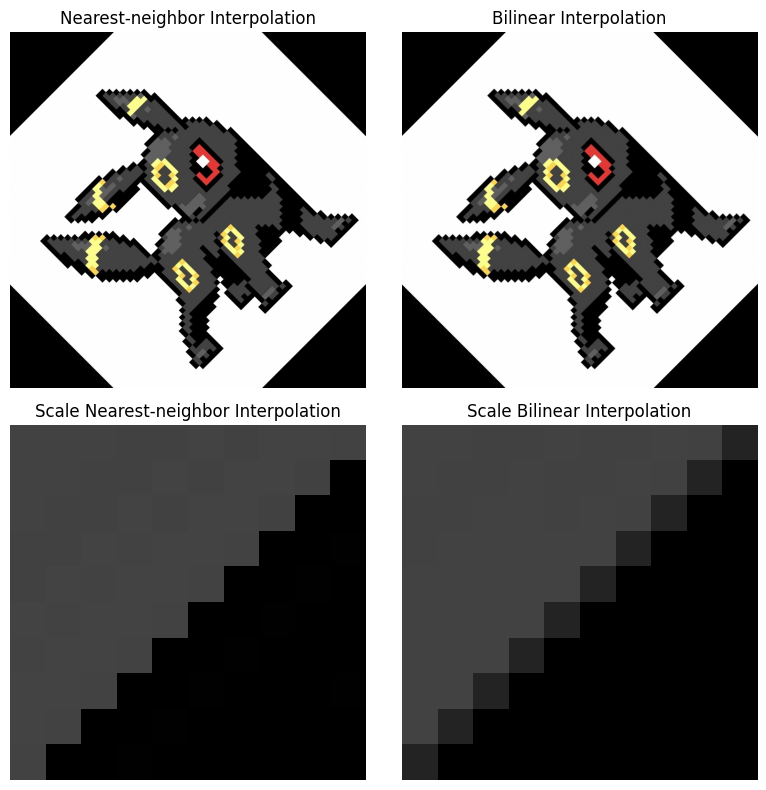

In [7]:
# Display the original and rotated images
plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.title("Nearest-neighbor Interpolation")
plt.imshow(rotated_nearest)
plt.axis("off")

plt.subplot(2, 2, 2)
plt.title("Bilinear Interpolation")
plt.imshow(rotated_bilinear)
plt.axis("off")


x_start = 320
y_start = 350
zoom_factor = 10

zoom_nearest = zoom(rotated_nearest, x_start, y_start, zoom_factor)
zoom_bilinear = zoom(rotated_bilinear, x_start, y_start, zoom_factor)

plt.subplot(2, 2, 3)
plt.title("Scale Nearest-neighbor Interpolation")
plt.imshow(zoom_nearest)
plt.axis("off")

plt.subplot(2, 2, 4)
plt.title("Scale Bilinear Interpolation")
plt.imshow(zoom_bilinear)
plt.axis("off")

plt.tight_layout()
plt.savefig("result.jpg")
plt.show()
